In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
data_df= pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-TheCompleteGuide/main/googleplaystore.csv")

In [4]:
data=data_df.copy()

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [8]:
data[data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: object

In [11]:
data.Reviews.str.isnumeric()

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: Reviews, Length: 10358, dtype: bool

In [12]:
data.Reviews.str.isnumeric().sum()

10357

In [13]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
data = data.drop(index=10472)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
data['Reviews']=data['Reviews'].astype(int)

In [17]:
data['Reviews'].dtype

dtype('int32')

In [18]:
data['Size']


0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10357, dtype: object

In [19]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
data['Size'].nunique()

461

In [21]:
data.Size=data.Size.str.replace('M',"000")

In [22]:
data.Size=data.Size.str.replace('k','')

In [23]:
data.Size=data.Size.str.replace( 'Varies with device',str(np.nan))

In [24]:
data['Size']=data['Size'].astype(float)

In [25]:
data['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10357, dtype: float64

In [26]:
for i in data['Size']:
    if i<10:
        data['Size']=data['Size'].replace(i,i*1000)

In [27]:
data['Size']


0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10357, dtype: float64

In [28]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [29]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10357, dtype: object

In [30]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [31]:
data.Installs=data.Installs.str.replace('+','')

In [32]:
data.Installs=data.Installs.str.replace(',','')

In [33]:
data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [34]:
data.Installs=data.Installs.astype(int)

In [35]:
data['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10357, dtype: object

In [36]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [37]:
data.Price=data.Price.str.replace('$','')

In [38]:
data.Price=data.Price.astype(float)

In [39]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [40]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [41]:
data['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10357, dtype: float64

In [42]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [43]:
data['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object

In [44]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

In [45]:
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [46]:
data['Last Updated'].dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: Last Updated, Length: 10357, dtype: int32

In [47]:
data['Last Updated'].dt.month     

0        1
1        1
2        8
3        6
4        6
        ..
10836    7
10837    7
10838    1
10839    1
10840    7
Name: Last Updated, Length: 10357, dtype: int32

In [48]:
data['Last Updated'].dt.day

0         7
1        15
2         1
3         8
4        20
         ..
10836    25
10837     6
10838    20
10839    19
10840    25
Name: Last Updated, Length: 10357, dtype: int32

In [49]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [50]:
data['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10357, dtype: object

In [51]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [52]:
data['Android Ver']=data['Android Ver'].replace('Varies with device',str(np.nan))

In [53]:
data['Android Ver']=data['Android Ver'].str.replace('and up','')

In [54]:
data['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       'nan', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '4.4W ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [55]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,nan
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,nan


In [56]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
362,TouchPal Keyboard - Fun Emoji & Android Keyboard,COMMUNICATION,4.4,615381,37000.0,10000000,Free,0.0,Mature 17+,Communication,2018-08-02,6.7.9.1,4.0.3
6160,CARS.bg,AUTO_AND_VEHICLES,4.5,276,1700.0,100000,Free,0.0,Everyone,Auto & Vehicles,2017-07-05,1.1.3,4.4
3667,Video Downloader,VIDEO_PLAYERS,4.2,59089,5400.0,10000000,Free,0.0,Everyone,Video Players & Editors,2018-08-03,1.0.8,4.4
6145,BGKontakti London BG Kontakti,SOCIAL,NaN,4,8900.0,500,Free,0.0,Everyone,Social,2017-03-23,1.2,3.0
10628,PriorityONE Credit Union of Fl,FINANCE,4.7,178,12000.0,1000,Free,0.0,Everyone,Finance,2018-06-12,5.9.1.0,5.0
10144,EZ-GUI Ground Station,TOOLS,4.7,3696,29000.0,50000,Free,0.0,Everyone,Tools,2017-08-10,4.5,4.3
8134,Alzashop.com,SHOPPING,4.5,32014,18000.0,500000,Free,0.0,Everyone,Shopping,2018-08-03,Varies with device,nan
10543,FK Radnicki Nis,SPORTS,NaN,1,26000.0,50,Free,0.0,Everyone,Sports,2018-02-19,1.0,4.1
6456,Bm,FAMILY,NaN,1,1700.0,100,Free,0.0,Everyone,Puzzle,2016-09-21,1.0,4.0.3
8475,Super DK vs Kong Brother Advanced Free Classic,GAME,3.8,66,38000.0,10000,Free,0.0,Everyone,Arcade,2018-07-17,1.2,4.1


In [57]:
data.shape

(10357, 13)

In [58]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rating,8892.0,4.187877,1.0,4.0,4.3,4.5,5.0,0.522377
Reviews,10357.0,405904.610602,0.0,32.0,1680.0,46416.0,78158306.0,2696777.836748
Size,8831.0,21277.437436,10.0,4700.0,13000.0,29000.0,100000.0,22547.690005
Installs,10357.0,14157759.440668,0.0,1000.0,100000.0,1000000.0,1000000000.0,80239553.869017
Price,10357.0,1.0308,0.0,0.0,0.0,0.0,400.0,16.278625
Last Updated,10357,2017-11-14 09:25:19.320266496,2010-05-21 00:00:00,2017-09-03 00:00:00,2018-05-20 00:00:00,2018-07-19 00:00:00,2018-08-08 00:00:00,NaN


In [59]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [60]:
data["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10357, dtype: int32

In [61]:
data["Reviews"].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [62]:
numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [63]:
numeric_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']

In [64]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [65]:
data[numeric_features]

,Rating,Reviews,Size,Installs,Price,Last Updated
0,4.1,159,19000.0,10000,0.0,2018-01-07
1,3.9,967,14000.0,500000,0.0,2018-01-15
2,4.7,87510,8700.0,5000000,0.0,2018-08-01
3,4.5,215644,25000.0,50000000,0.0,2018-06-08
4,4.3,967,2800.0,100000,0.0,2018-06-20
...,...,...,...,...,...,...
10836,4.5,38,53000.0,5000,0.0,2017-07-25
10837,5.0,4,3600.0,100,0.0,2018-07-06
10838,NaN,3,9500.0,1000,0.0,2017-01-20
10839,4.5,114,NaN,1000,0.0,2015-01-19


In [66]:
data[categorical_features]

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,nan


In [67]:
data['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

In [68]:
data['Type'].value_counts(normalize=True)

Type
Free    0.92613
Paid    0.07387
Name: proportion, dtype: float64

In [69]:
data['Type'].value_counts(normalize=True)*100

Type
Free    92.612978
Paid     7.387022
Name: proportion, dtype: float64

In [70]:
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [71]:
for col in categorical_features:
    print(f"{col}:{data[col].value_counts(normalize=True)*100}")
    print("======================================================")

App:App
ROBLOX                                           0.086898
8 Ball Pool                                      0.067587
Bubble Shooter                                   0.057932
Helix Jump                                       0.057932
Zombie Catchers                                  0.057932
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.009655
PixelLab - Text on pictures                      0.009655
P Launcher for Android™ 9.0                      0.009655
Pacify (Android P theme) - Theme for Xperia™     0.009655
iHoroscope - 2018 Daily Horoscope & Astrology    0.009655
Name: proportion, Length: 9659, dtype: float64
Category:Category
FAMILY                 18.760259
GAME                   10.823598
TOOLS                   8.139423
BUSINESS                4.122815
MEDICAL                 3.939365
PRODUCTIVITY            3.929709
PERSONALIZATION         3.746259
LIFESTYLE               3.601429
COMMUNICATION           3

<Axes: xlabel='Type', ylabel='count'>

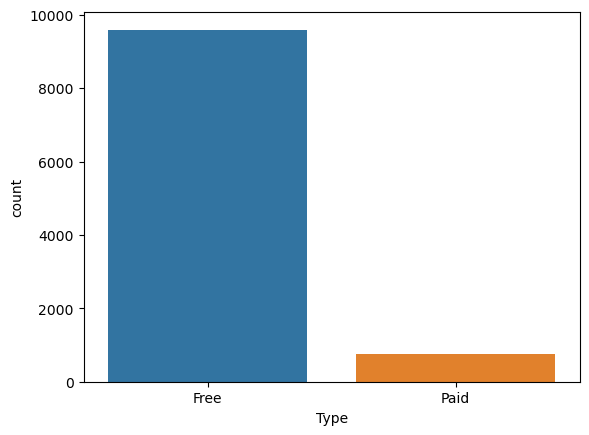

In [72]:
sns.countplot(x=data['Type'])

<Axes: xlabel='Content Rating', ylabel='count'>

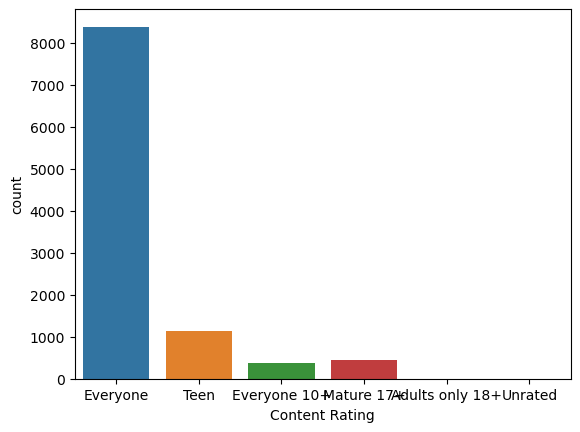

In [73]:
sns.countplot(x=data['Content Rating'])

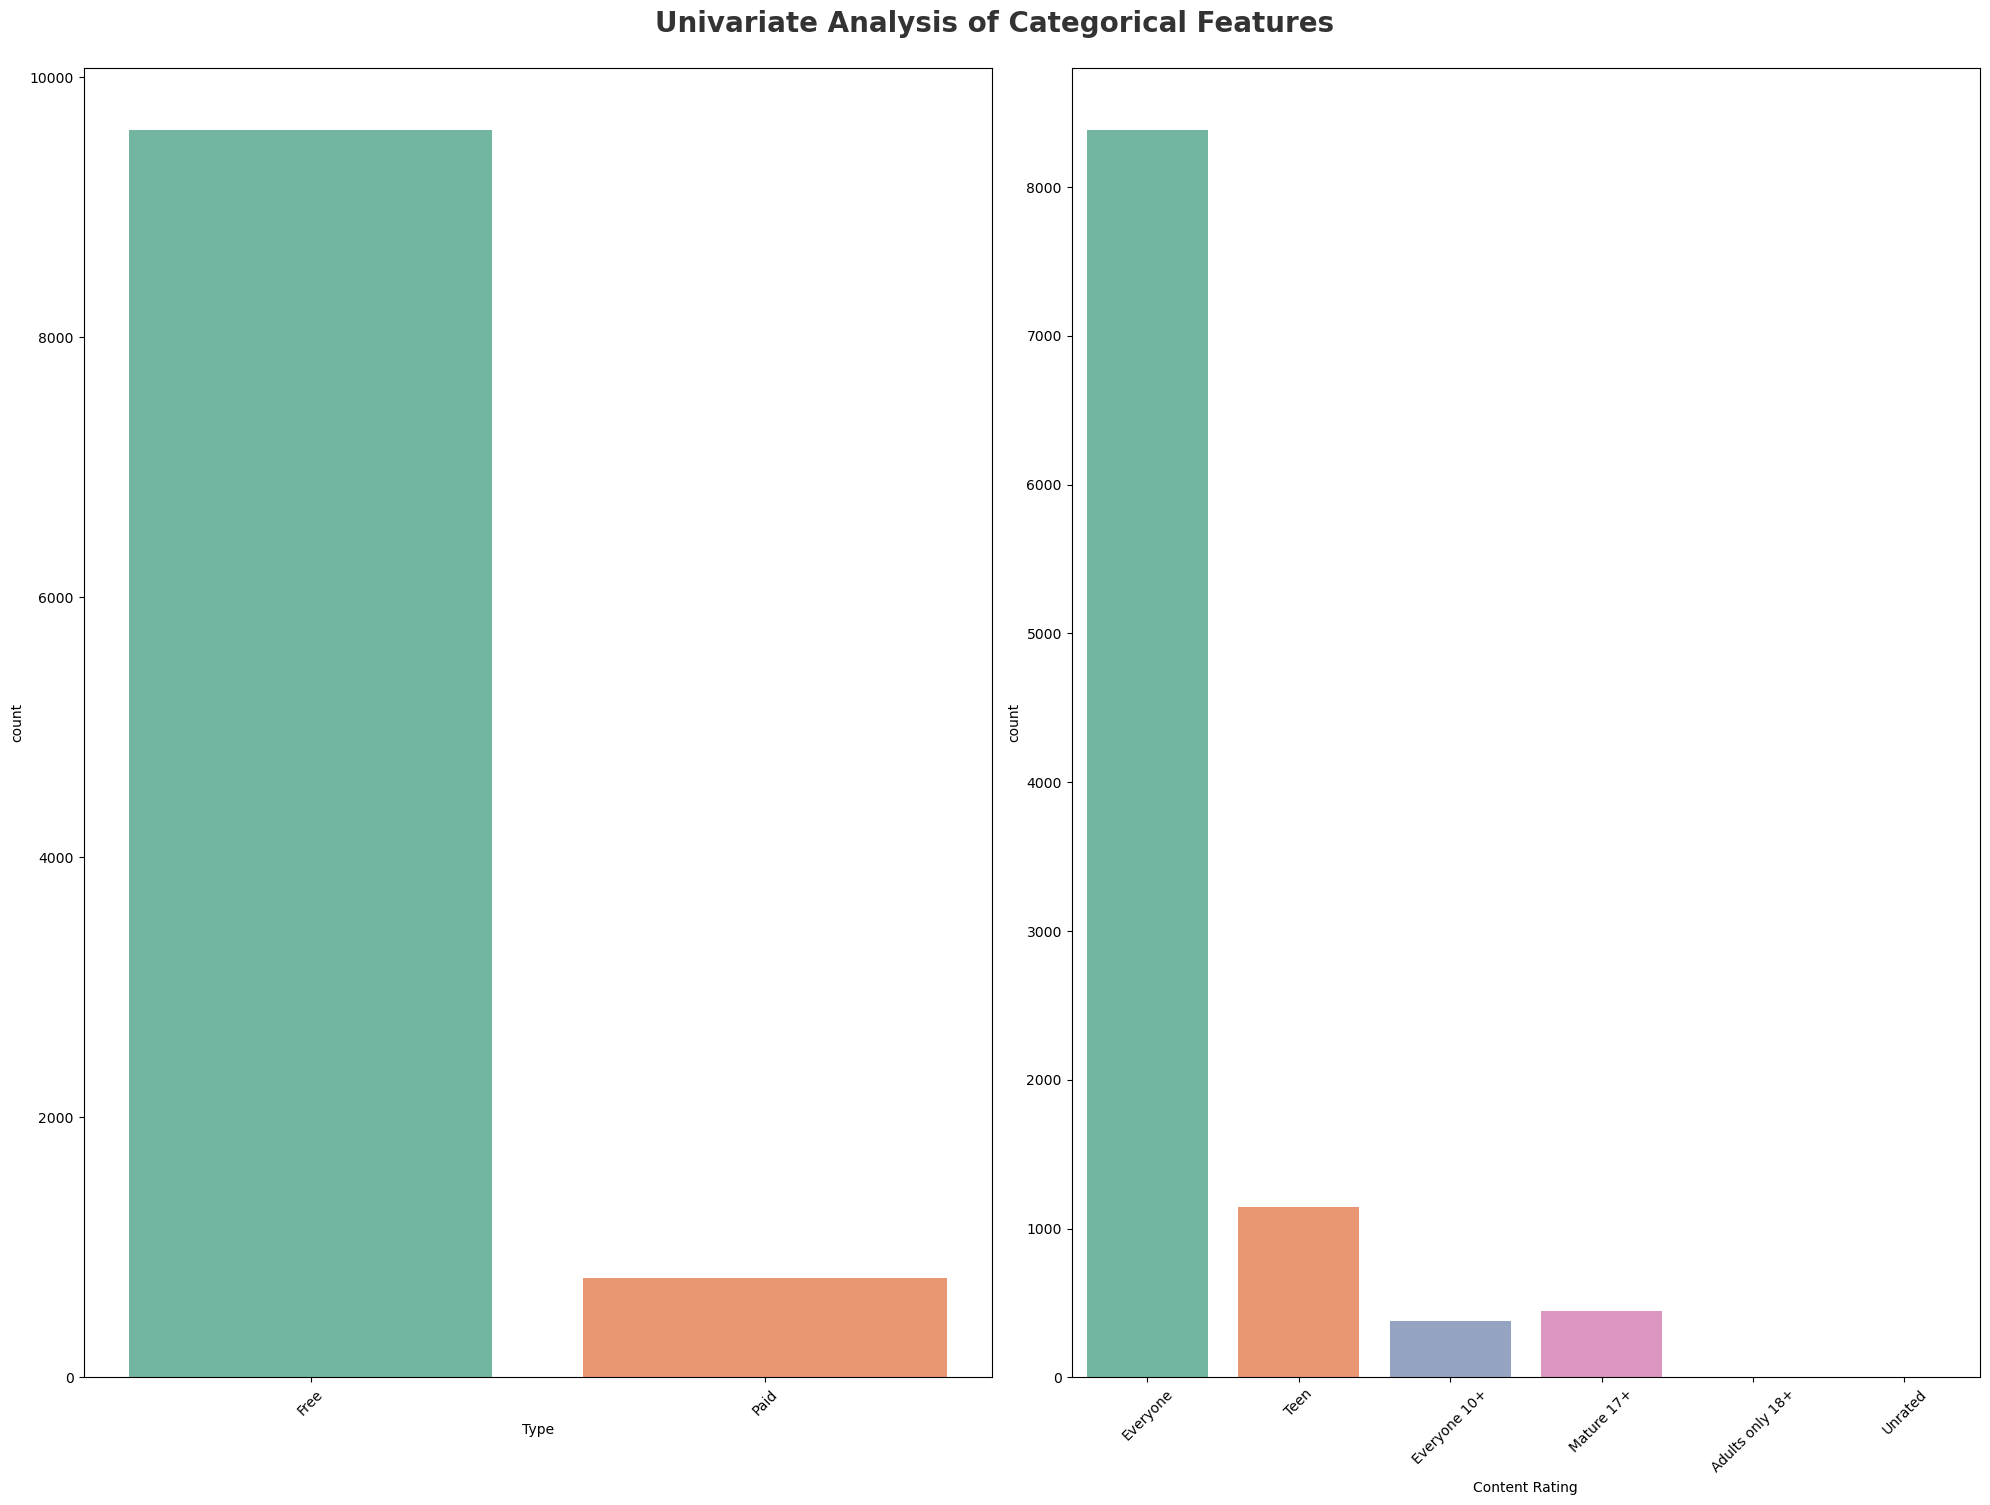

In [74]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=20, fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(1,2,i+1)
    sns.countplot(x=data[category[i]],palette="Set2")
    plt.xticks(rotation=45)
    plt.xlabel(category[i])
    plt.tight_layout()
   

In [75]:
numeric_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']

<Axes: xlabel='Price', ylabel='Density'>

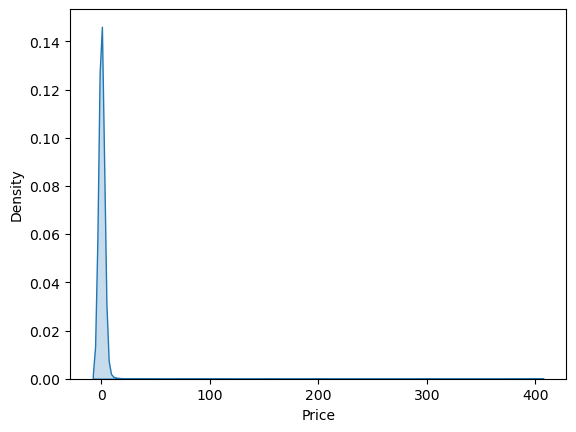

In [76]:
sns.kdeplot(data['Price'],shade=True)

<Axes: xlabel='Reviews', ylabel='Density'>

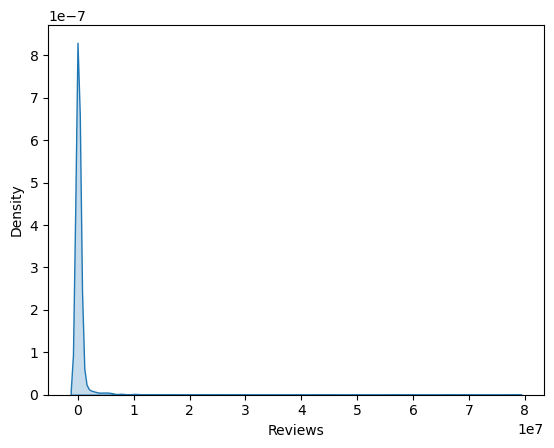

In [77]:
sns.kdeplot(data['Reviews'],shade=True)

<Axes: xlabel='Rating', ylabel='Density'>

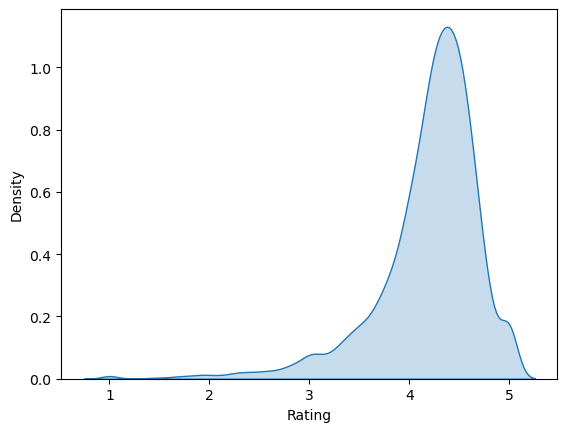

In [78]:
sns.kdeplot(data['Rating'],shade=True)

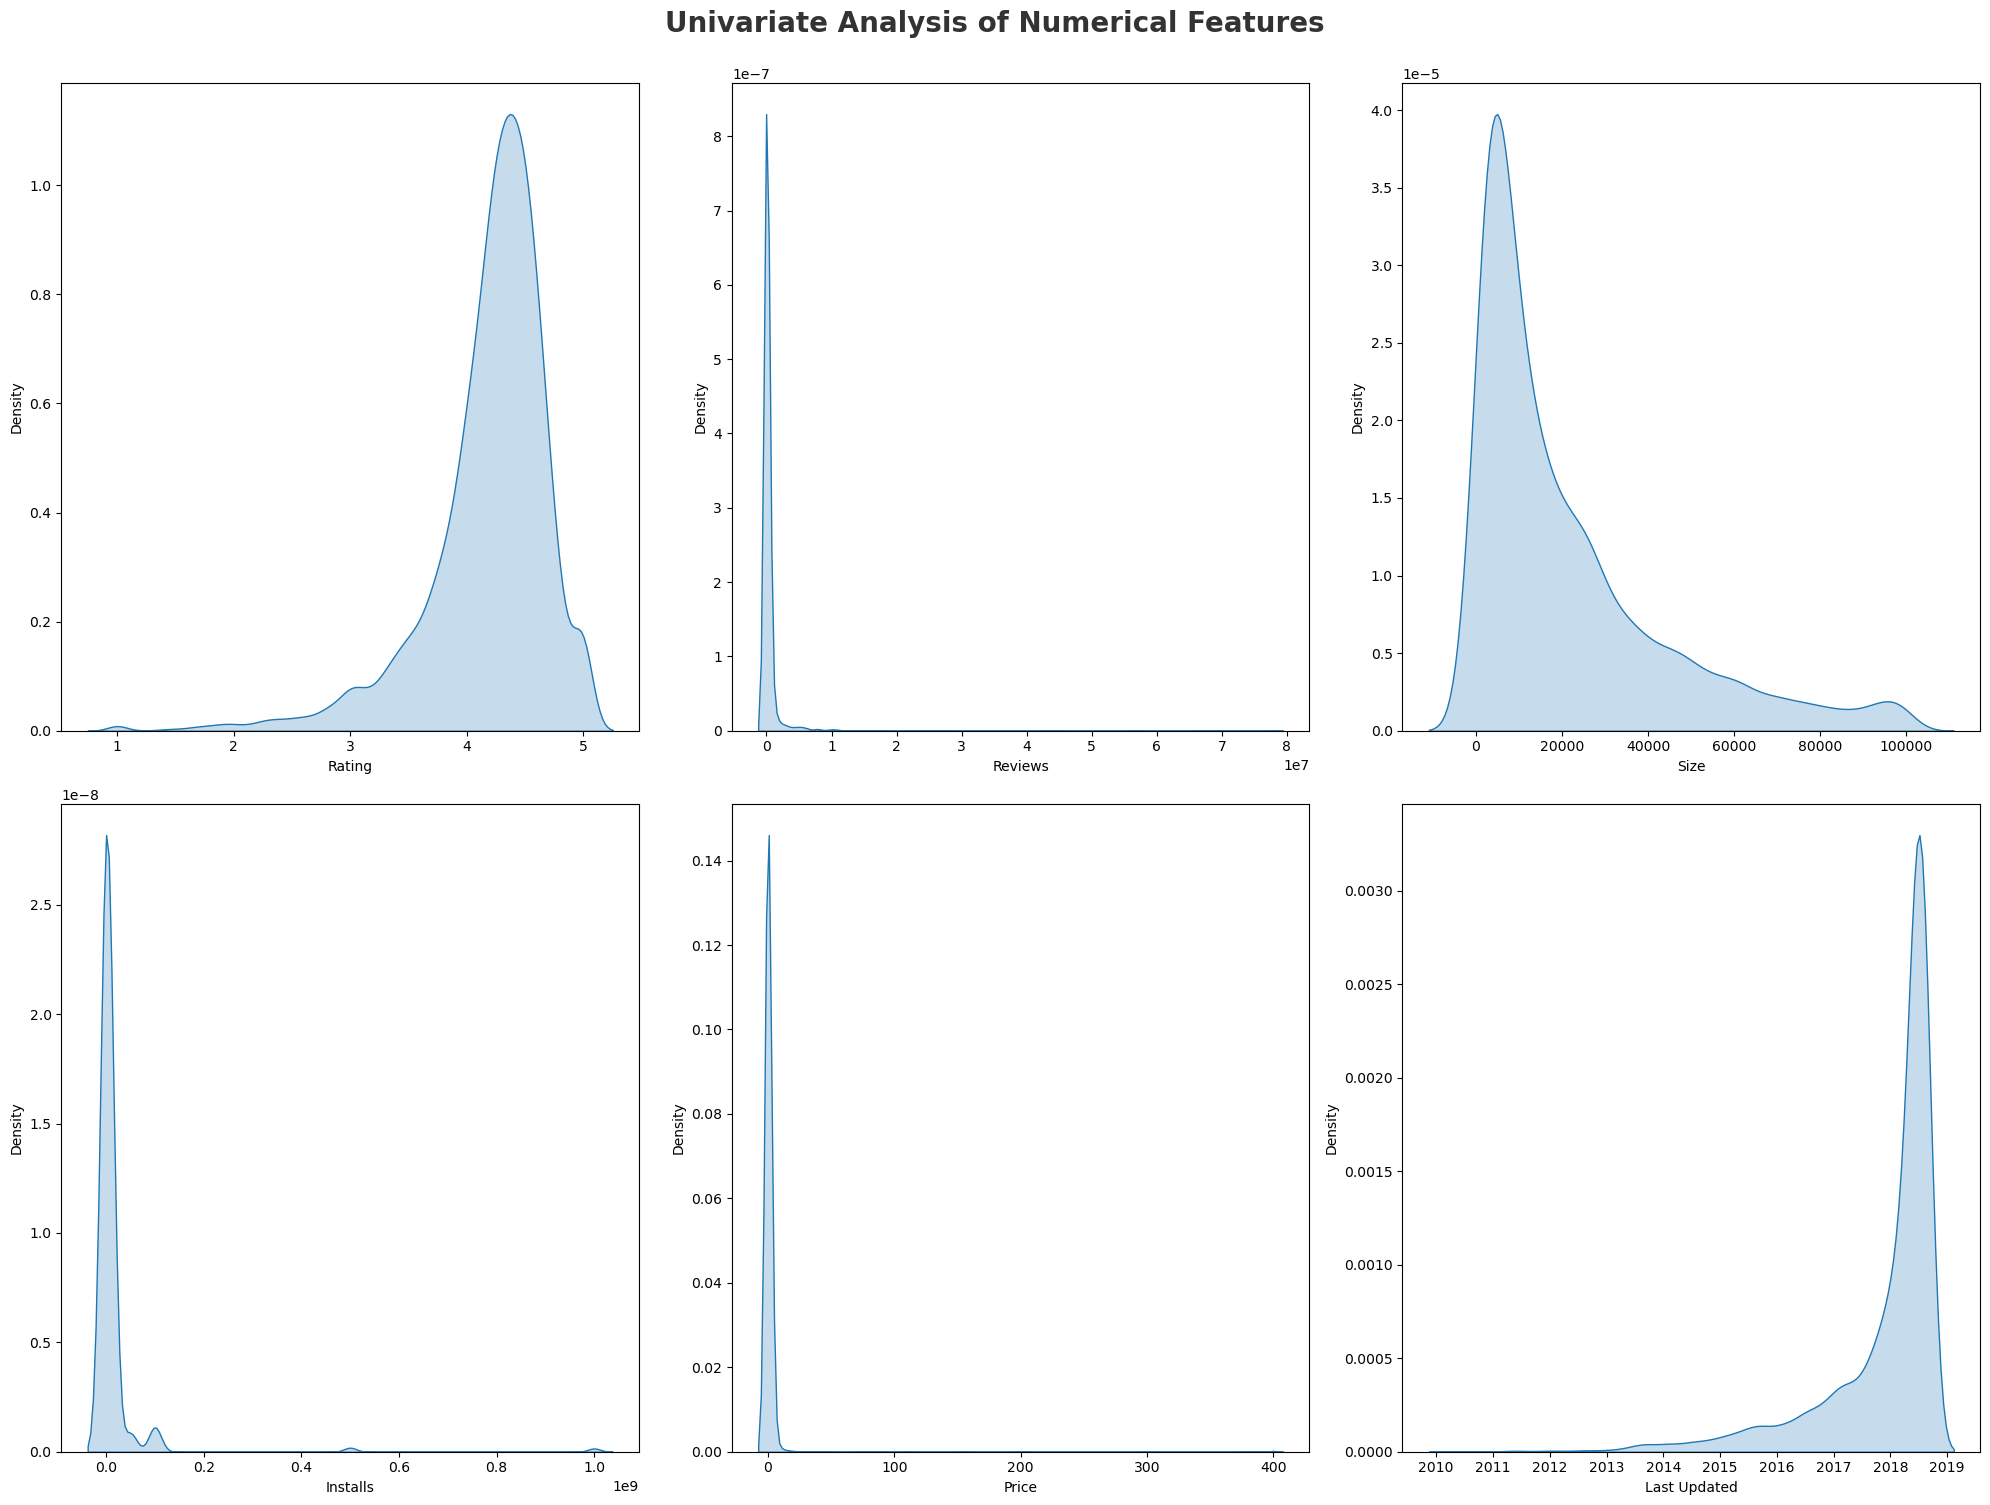

In [79]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20, fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(numeric_features)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data[numeric_features[i]],shade=True)
    plt.tight_layout()

<Axes: xlabel='Size', ylabel='Count'>

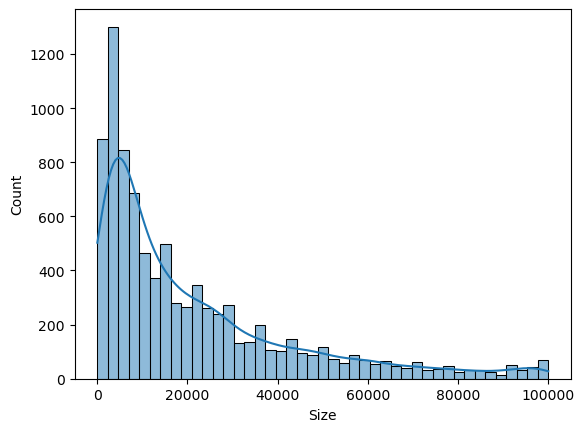

In [80]:
sns.histplot(data['Size'],kde=True)

In [83]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [84]:
data['App'].nunique()

9659

In [88]:
data['App'].value_counts().sort_values(ascending=False)[:10]

App
ROBLOX                            9
8 Ball Pool                       7
Bubble Shooter                    6
Zombie Catchers                   6
Helix Jump                        6
Granny                            5
Duolingo: Learn Languages Free    5
Temple Run 2                      5
Bowmasters                        5
Zombie Tsunami                    5
Name: count, dtype: int64

<Axes: ylabel='count'>

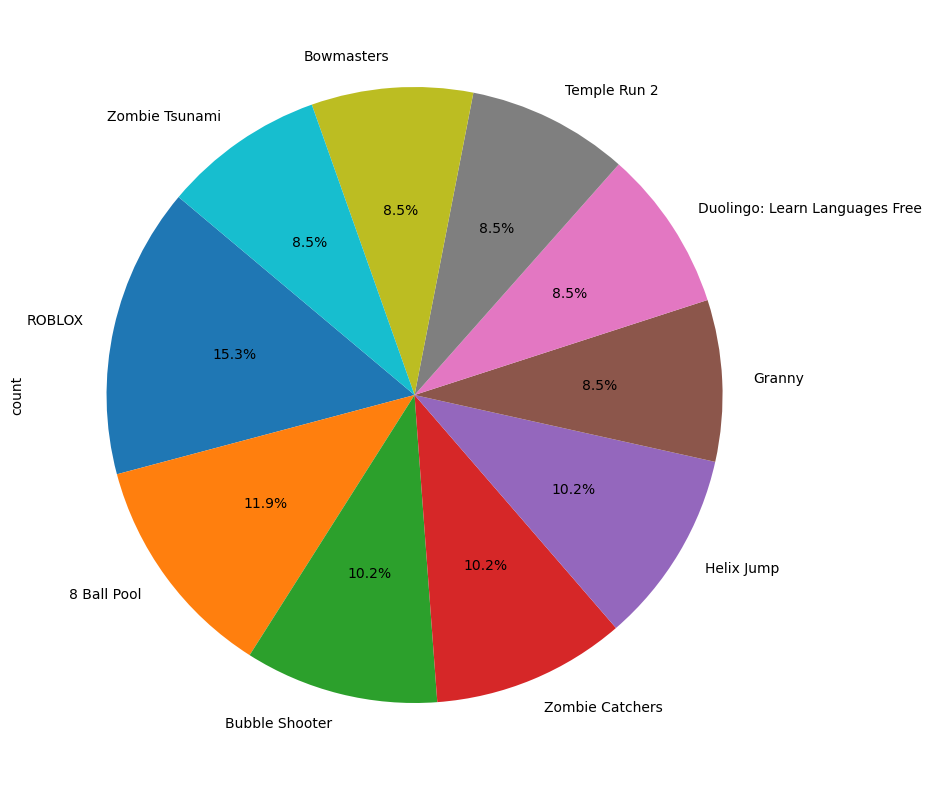

In [98]:
data['App'].value_counts().sort_values(ascending=False)[:10].plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=140)

<Axes: ylabel='count'>

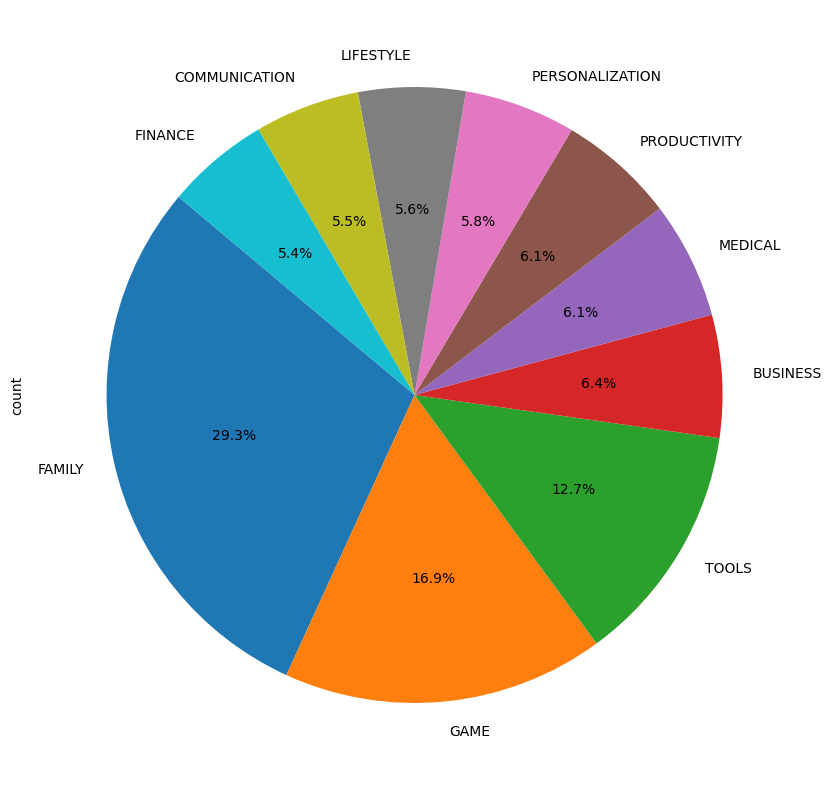

In [99]:
data['Category'].value_counts().sort_values(ascending=False)[:10].plot.pie(figsize=(10, 10), autopct='%1.1f%%', startangle=140)

In [103]:
dfa = data['Category'].value_counts().sort_values(ascending=False).reset_index()

In [106]:
dfa.head()

,Category,count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408


<Axes: xlabel='Category', ylabel='count'>

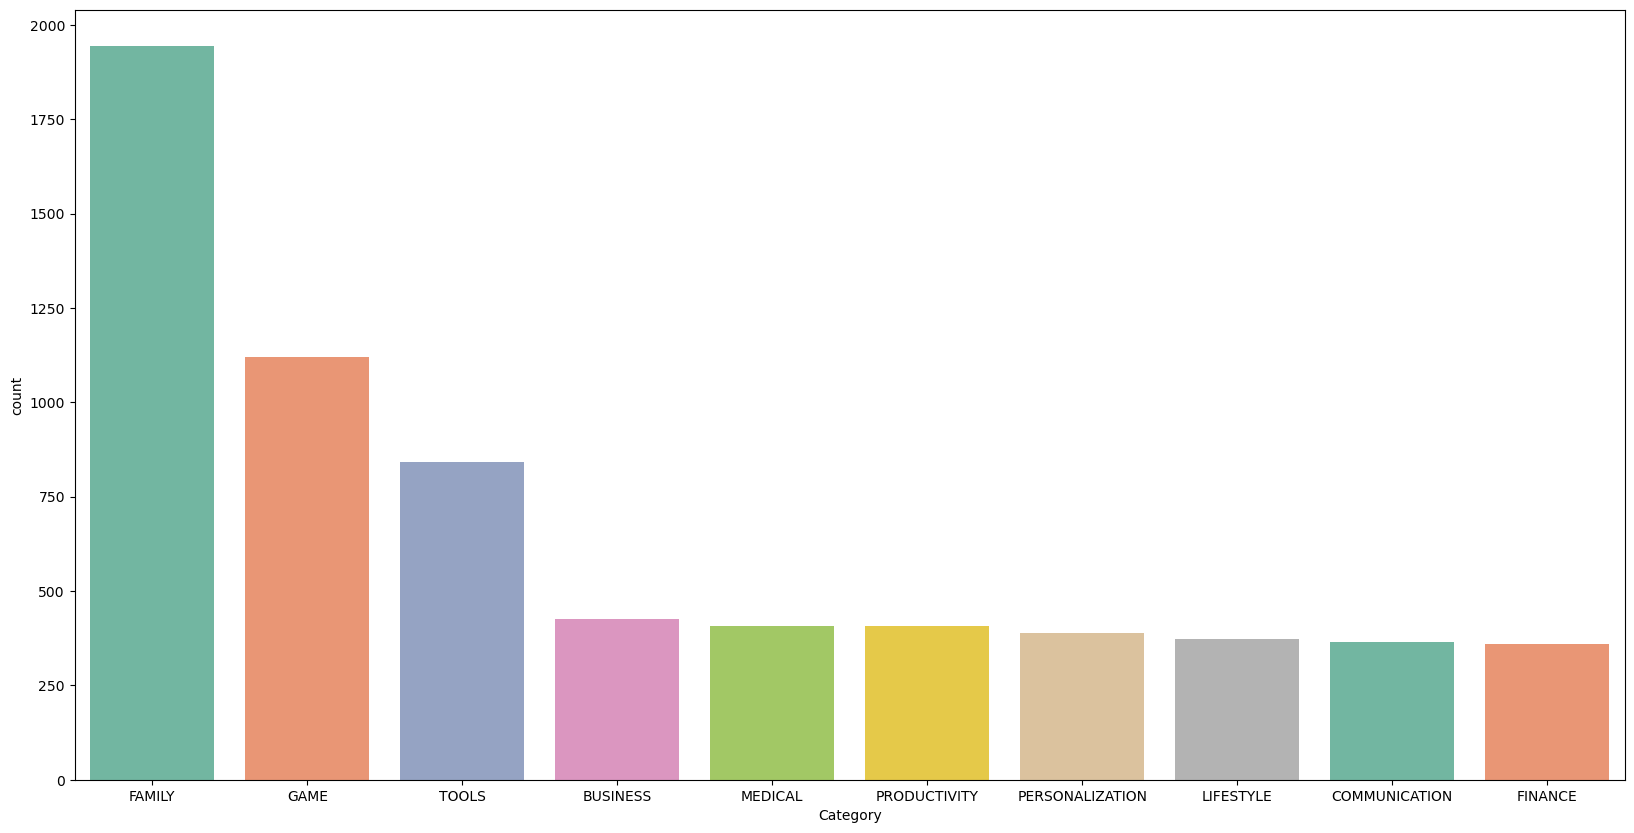

In [115]:
plt.figure(figsize=(20,10))
sns.barplot(x='Category',y='count',data = dfa[:10],palette='Set2')

In [121]:
data.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452771915
FAMILY                 10041692505
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074494782
BOOKS_AND_REFERENCE     1916469576
SPORTS                  1528574498
HEALTH_AND_FITNESS      1361022512
BUSINESS                 863664865
FINANCE                  770348734
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                534823539
EDUCATION                533952000
WEATHER                  426100520
FOOD_AND_DRINK           257898751
DATING                   206536107
HOUSE_AND_HOME           125212461
ART_AND_DESIGN           124338100
LIBRARIES_AND_DEMO        62995910
COMICS                    56086150
AUTO_AND_VE

In [122]:
data.groupby('Category')['Installs'].sum().sort_values(ascending=False)[:10]

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

In [125]:
dfa = data.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

In [127]:
dfa.head()

,Category,Installs
0,GAME,31544024415
1,COMMUNICATION,24152276251
2,SOCIAL,12513867902
3,PRODUCTIVITY,12463091369
4,TOOLS,11452771915


<Axes: xlabel='Installs', ylabel='Category'>

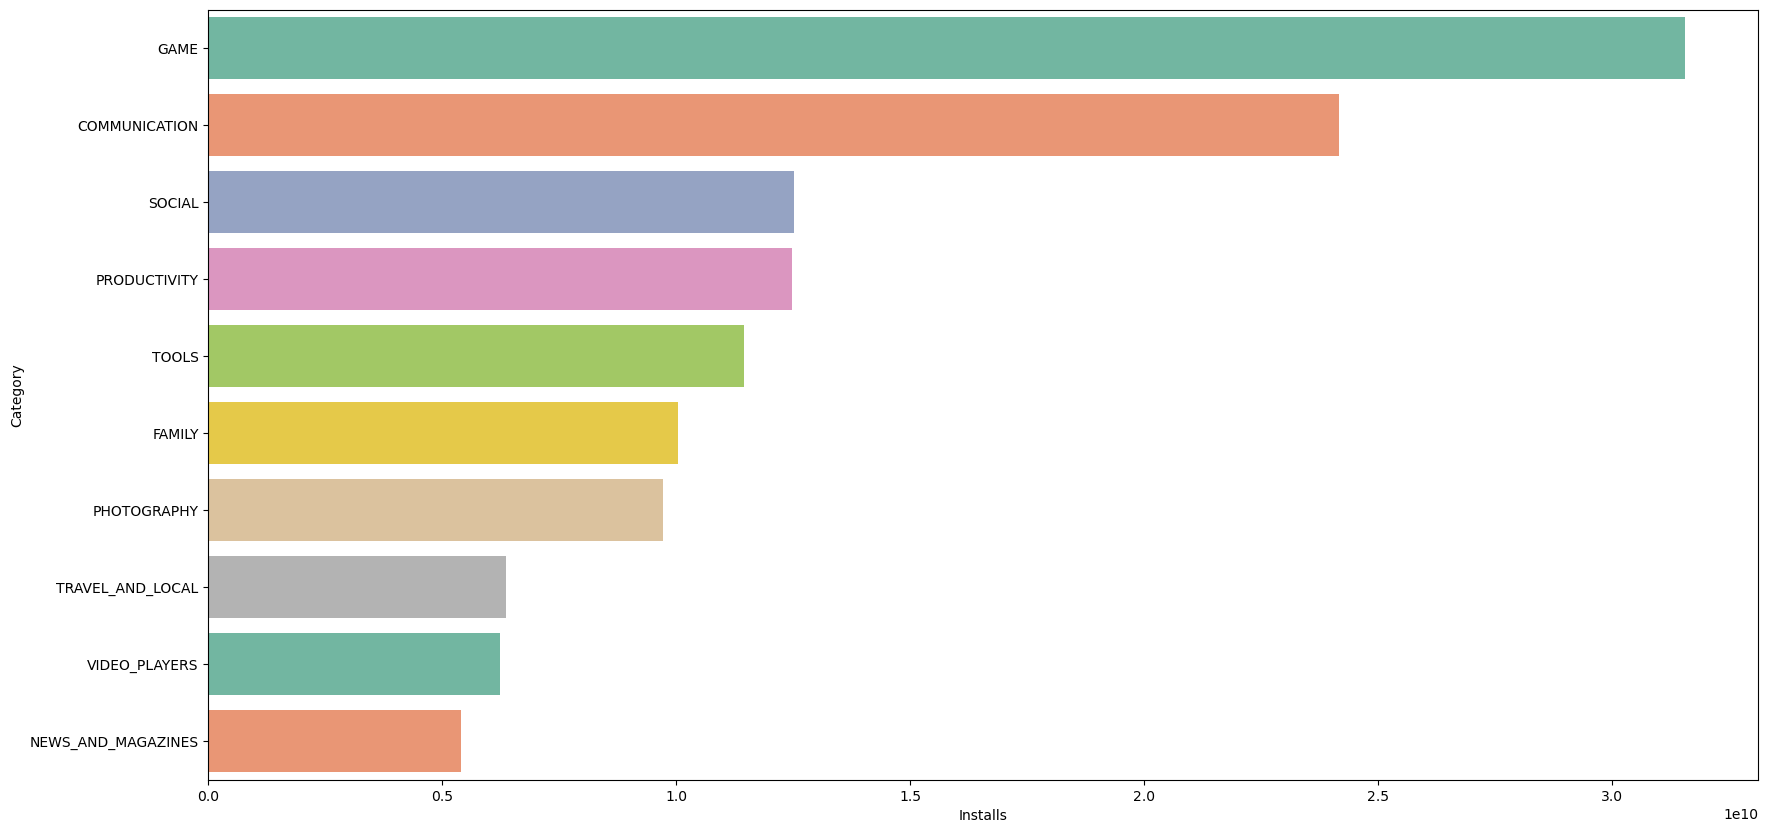

In [130]:
plt.figure(figsize=(20,10))
sns.barplot(x='Installs',y='Category',data = dfa[:10],palette='Set2')

In [136]:
data.groupby(['Category','App'])['Installs'].sum()

Category        App                                                                              
ART_AND_DESIGN  350 Diy Room Decor Ideas                                                                10000
                3D Color Pixel by Number - Sandbox Art Coloring                                        100000
                AJ Styles HD Wallpapers                                                                  5000
                AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper                                        1000
                Ai illustrator viewer                                                                  100000
                                                                                                       ...   
WEATHER         Yahoo Weather                                                                        10000000
                Yahoo! Weather for SH Forecast for understanding the approach of rain clouds Free     1000000
                Yandex

In [134]:
data.groupby(['Category','App'])['Installs'].sum().reset_index()

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000
4,ART_AND_DESIGN,Ai illustrator viewer,100000
...,...,...,...
9739,WEATHER,Yahoo Weather,10000000
9740,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000
9741,WEATHER,Yandex.Weather,10000000
9742,WEATHER,weather - weather forecast,1000000


In [137]:
dfb = data.groupby(['Category','App'])['Installs'].sum().reset_index()

In [138]:
dfb.sort_values('Installs',ascending=False)

,Category,App,Installs
4852,GAME,Subway Surfers,5000000000
7160,PHOTOGRAPHY,Google Photos,4000000000
1065,COMMUNICATION,Hangouts,4000000000
9426,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,3000000000
1059,COMMUNICATION,Google Chrome: Fast & Secure,3000000000
...,...,...,...
7674,PRODUCTIVITY,cronometra-br,0
2230,FAMILY,Command & Conquer: Rivals,0
6551,NEWS_AND_MAGAZINES,Sweden Newspapers,0
7888,SOCIAL,Ak Parti Yardım Toplama,0


In [141]:
dfb[dfb['Category']=='GAME'].sort_values('Installs',ascending=False)[:10]

,Category,App,Installs
4852,GAME,Subway Surfers,5000000000
4881,GAME,Temple Run 2,2500000000
4245,GAME,Candy Crush Saga,2000000000
4707,GAME,Pou,1500000000
4659,GAME,My Talking Tom,1000000000
4517,GAME,Helix Jump,600000000
4047,GAME,8 Ball Pool,600000000
4993,GAME,slither.io,500000000
4985,GAME,Zombie Tsunami,500000000
4090,GAME,Angry Birds Classic,500000000


In [142]:
dfb[dfb['Category']=='PRODUCTIVITY'].sort_values('Installs',ascending=False)[:10]

,Category,App,Installs
7507,PRODUCTIVITY,Google Drive,3000000000
7444,PRODUCTIVITY,Dropbox,1500000000
7552,PRODUCTIVITY,Microsoft Word,1500000000
7505,PRODUCTIVITY,Google Calendar,1500000000
7414,PRODUCTIVITY,Cloud Print,500000000
7547,PRODUCTIVITY,Microsoft OneNote,300000000
7460,PRODUCTIVITY,ES File Explorer File Manager,300000000
7484,PRODUCTIVITY,"Evernote – Organizer, Planner for Notes & Memos",300000000
7337,PRODUCTIVITY,Adobe Acrobat Reader,300000000
7546,PRODUCTIVITY,Microsoft OneDrive,200000000


In [143]:
dfb[dfb['Category']=='FAMILY'].sort_values('Installs',ascending=False)[:10]

,Category,App,Installs
2698,FAMILY,Google Play Games,1000000000
2149,FAMILY,Candy Crush Saga,500000000
3005,FAMILY,My Talking Tom,500000000
3135,FAMILY,Pou,500000000
3183,FAMILY,ROBLOX,400000000
2429,FAMILY,Duolingo: Learn Languages Free,300000000
2966,FAMILY,Minion Rush: Despicable Me Official Game,200000000
3399,FAMILY,Toca Kitchen 2,150000000
3521,FAMILY,YouTube Kids,150000000
2662,FAMILY,Frozen Free Fall,150000000


In [144]:
dfb['Category'].nunique()

33

In [145]:
appcategory = ['GAME','PRODUCTIVITY','FAMILY','TOOLS','MEDICAL','BUSINESS','PERSONALIZATION','LIFESTYLE','SPORTS','COMMUNICATION']

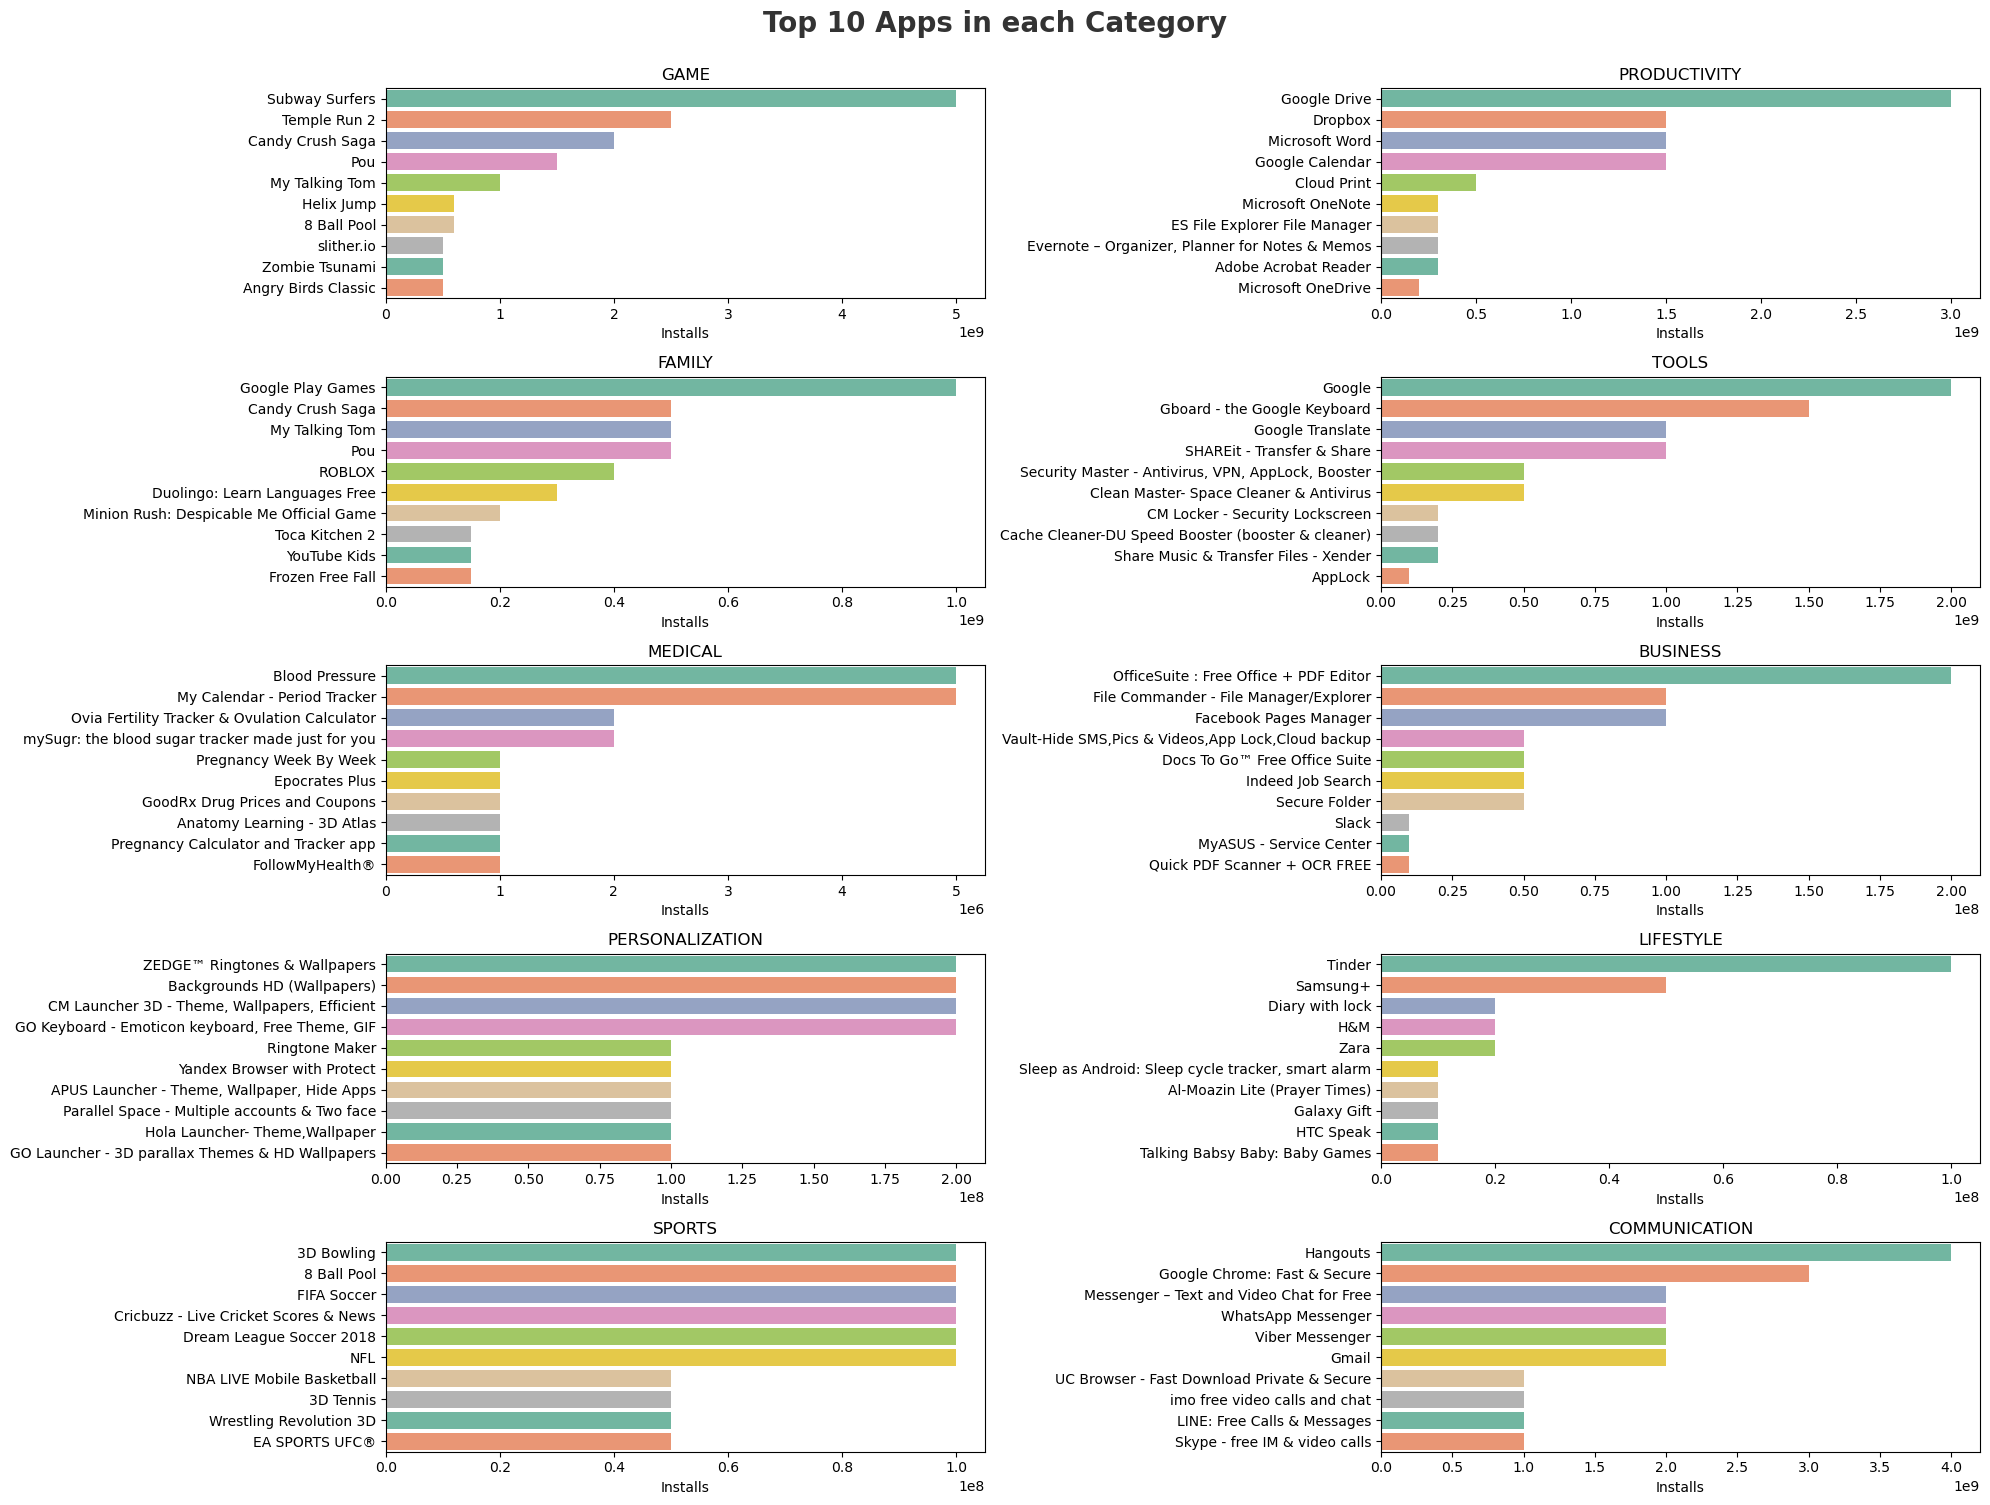

In [148]:
plt.figure(figsize=(20,15))
plt.suptitle("Top 10 Apps in each Category",fontsize=20, fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(appcategory)):
    plt.subplot(5,2,i+1)
    sns.barplot(x='Installs',y='App',data = dfb[dfb['Category']==appcategory[i]].sort_values('Installs',ascending=False)[:10],palette='Set2')
    plt.title(appcategory[i])
    plt.ylabel('')
    plt.tight_layout()

In [172]:
data.groupby(["App"])["Rating"].sum().sort_values(ascending=False).reset_index()

,App,Rating
0,ROBLOX,40.5
1,8 Ball Pool,31.5
2,Zombie Catchers,28.2
3,Bubble Shooter,26.9
4,Helix Jump,25.2
...,...,...
9654,F-1 watchface by Delta,0.0
9655,The EU Relocation Programme,0.0
9656,DB BAHN,0.0
9657,F Length Sim (no Ads),0.0


In [162]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [180]:
data[data['Rating']==5][['App','Rating']]

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
...,...,...
10721,Mad Dash Fo' Cash,5.0
10742,GKPB FP Online Church,5.0
10776,Monster Ride Pro,5.0
10820,Fr. Daoud Lamei,5.0


In [181]:
dfb = data[data['Rating']==5][['App','Rating']]

In [187]:
data[['Category','App','Installs','Rating']]

,Category,App,Installs,Rating
0,ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook,10000,4.1
1,ART_AND_DESIGN,Coloring book moana,500000,3.9
2,ART_AND_DESIGN,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,4.7
3,ART_AND_DESIGN,Sketch - Draw & Paint,50000000,4.5
4,ART_AND_DESIGN,Pixel Draw - Number Art Coloring Book,100000,4.3
...,...,...,...,...
10836,FAMILY,Sya9a Maroc - FR,5000,4.5
10837,FAMILY,Fr. Mike Schmitz Audio Teachings,100,5.0
10838,MEDICAL,Parkinson Exercices FR,1000,NaN
10839,BOOKS_AND_REFERENCE,The SCP Foundation DB fr nn5n,1000,4.5


<Axes: xlabel='Price', ylabel='Category'>

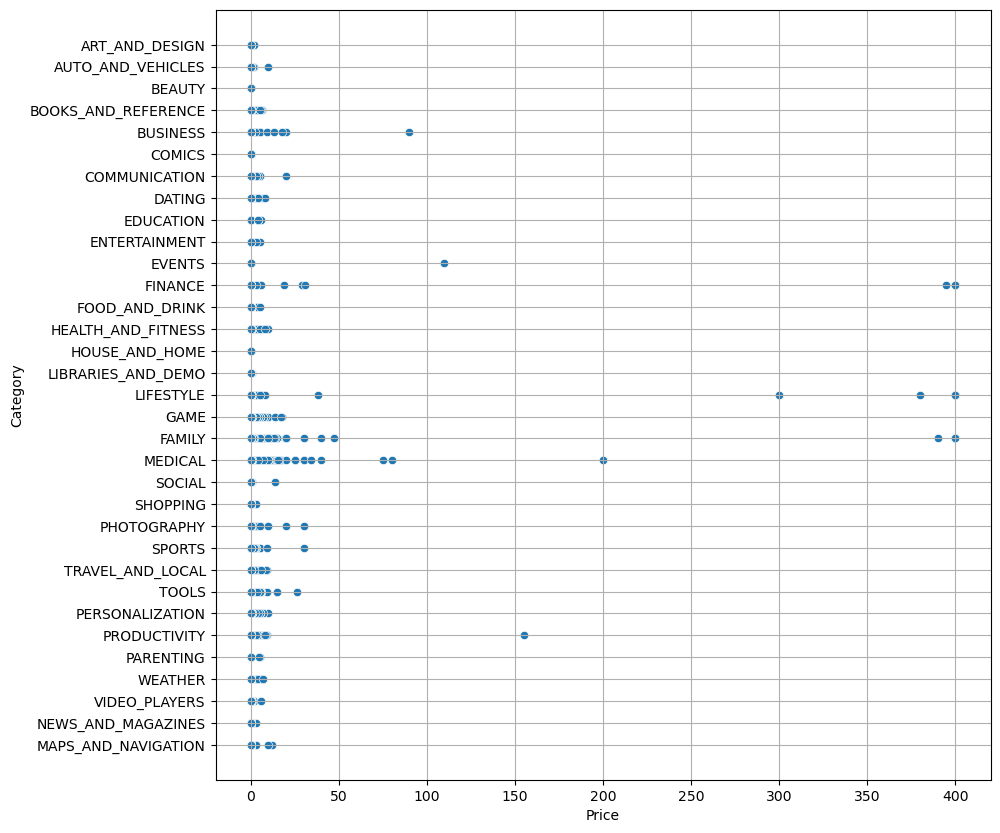

In [193]:
plt.figure(figsize=(10,10))
plt.grid()
sns.scatterplot(y='Category',x='Price',data=data)

In [194]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


In [205]:
data.sort_values('Reviews',ascending=False)[['App','Category','Reviews']]

,App,Category,Reviews
2544,Facebook,SOCIAL,78158306
3943,Facebook,SOCIAL,78128208
336,WhatsApp Messenger,COMMUNICATION,69119316
3904,WhatsApp Messenger,COMMUNICATION,69109672
2604,Instagram,SOCIAL,66577446
...,...,...,...
8872,Eat Right Diet (by Dt Shreya's Family Diet Cli...,HEALTH_AND_FITNESS,0
8871,Test Application DT 02,ART_AND_DESIGN,0
10347,Santa Fe Espresso & News,FOOD_AND_DRINK,0
10348,Santa Fe Sentry,HOUSE_AND_HOME,0


In [212]:
dfc = data.sort_values('Reviews',ascending=False)[['Category','Installs','Reviews']]

In [213]:
dfc.reset_index(drop=True,inplace=True)

In [214]:
dfc

,Category,Installs,Reviews
0,SOCIAL,1000000000,78158306
1,SOCIAL,1000000000,78128208
2,COMMUNICATION,1000000000,69119316
3,COMMUNICATION,1000000000,69109672
4,SOCIAL,1000000000,66577446
...,...,...,...
10352,HEALTH_AND_FITNESS,10,0
10353,ART_AND_DESIGN,0,0
10354,FOOD_AND_DRINK,10,0
10355,HOUSE_AND_HOME,100,0


In [218]:
data.groupby('Type').agg({'Installs':'sum'})

,Installs
Type,
Free,146562688646
Paid,69225881


<Axes: ylabel='Installs'>

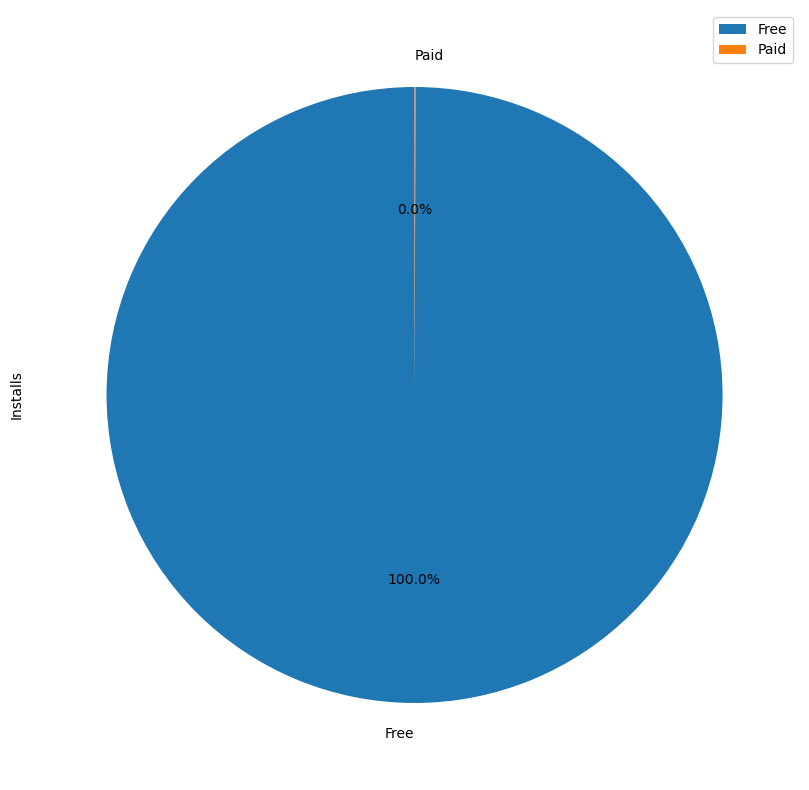

In [227]:
dff = data.groupby('Type').agg({'Installs':'sum'})
dff.plot.pie(y='Installs',autopct='%1.1f%%',figsize=(10,10),startangle=90)

In [225]:
dff

,Installs
Type,
Free,146562688646
Paid,69225881


<Axes: ylabel='count'>

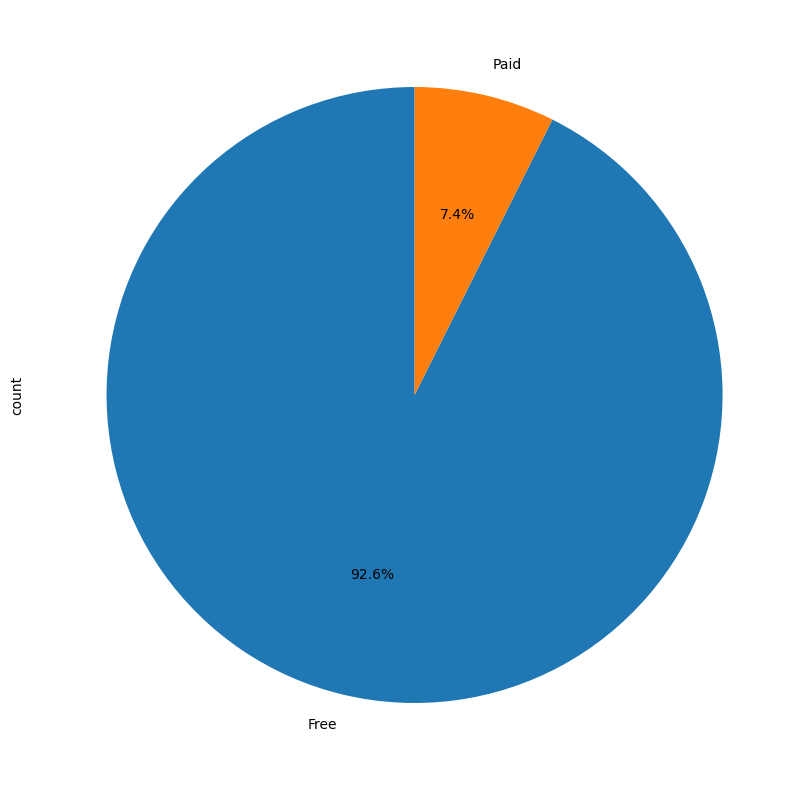

In [229]:
data.value_counts('Type').plot.pie(autopct='%1.1f%%',figsize=(10,10),startangle=90)

In [230]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


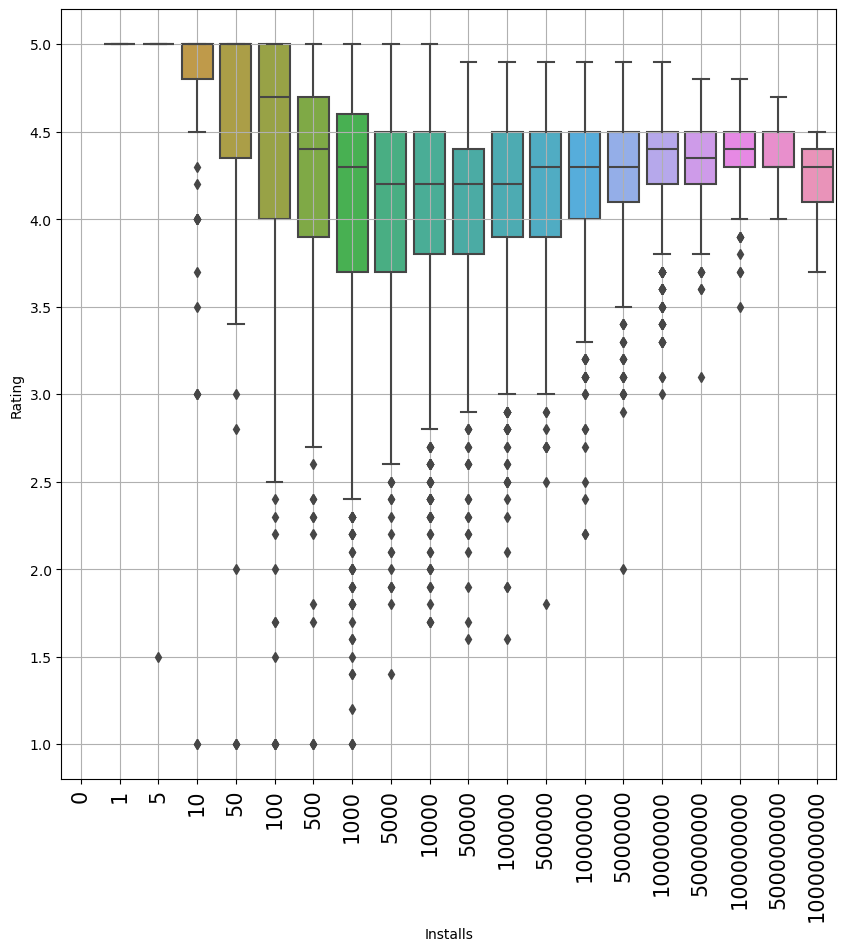

In [237]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Installs',y='Rating',data=data)
plt.xticks(rotation=90,size=15)
plt.grid()

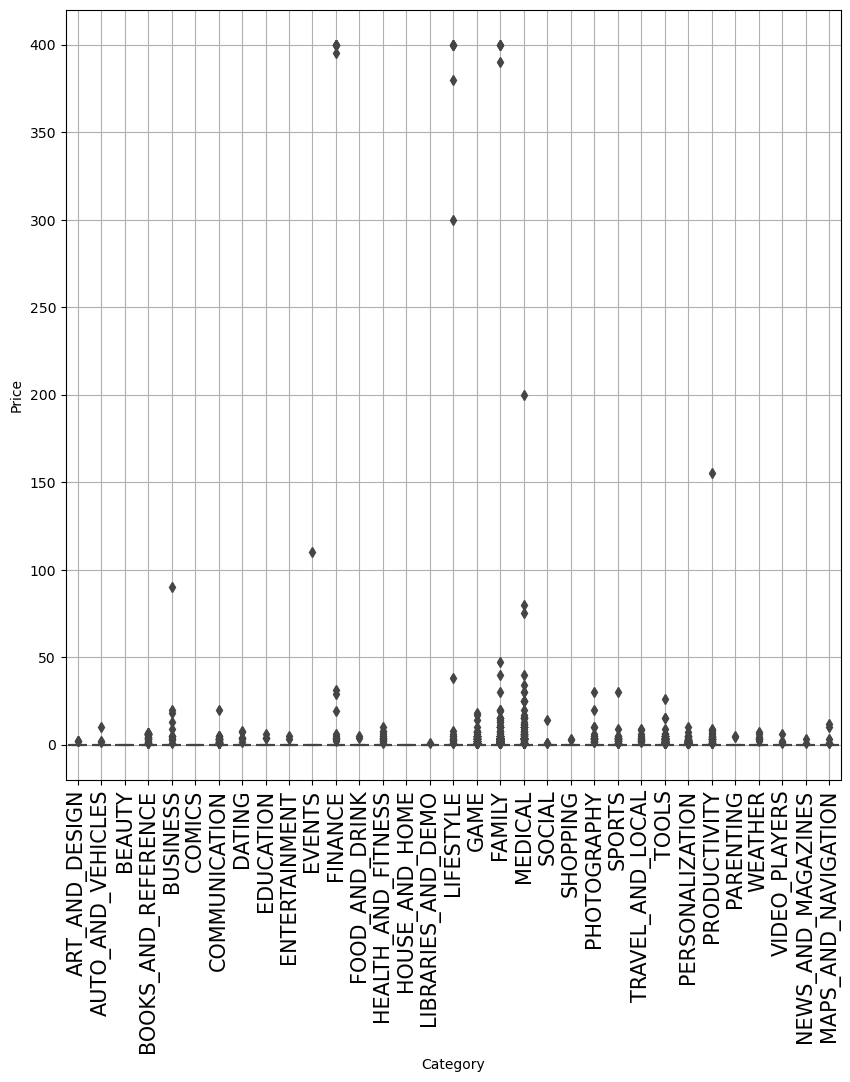

In [239]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Category',y='Price',data=data)
plt.xticks(rotation=90,size=15)
plt.grid()

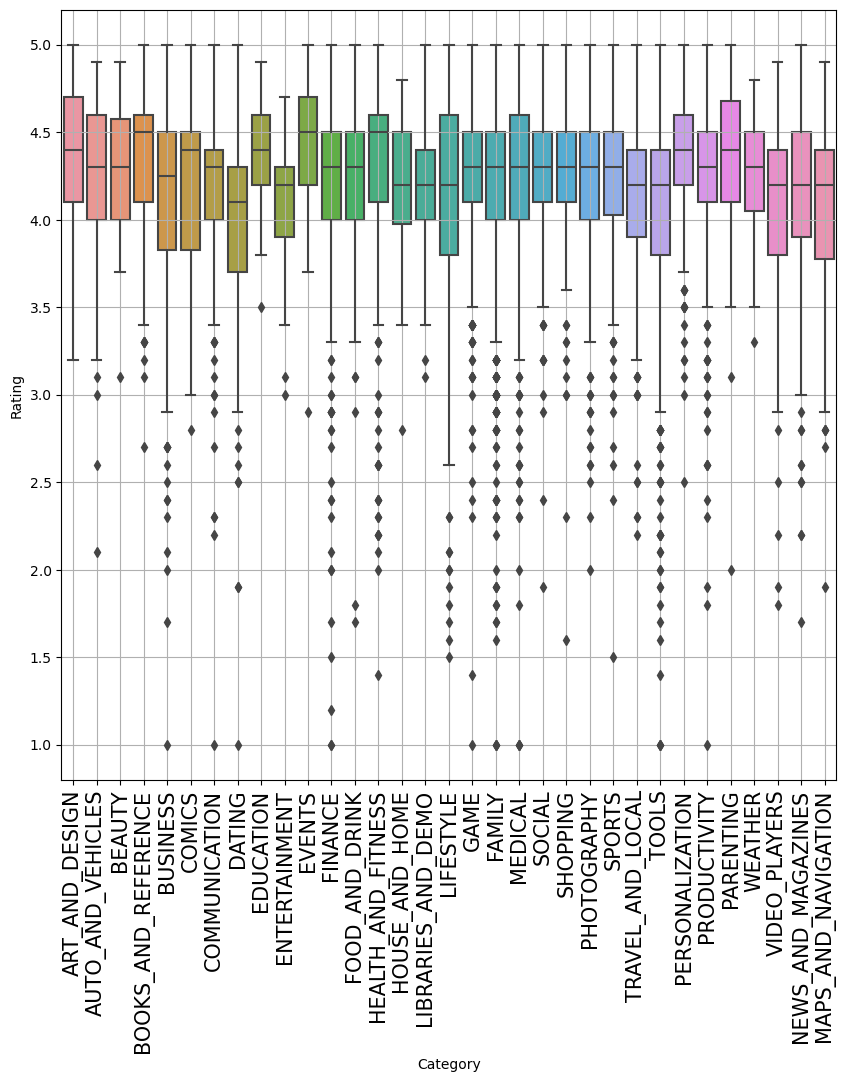

In [240]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Category',y='Rating',data=data)
plt.xticks(rotation=90,size=15)
plt.grid()

<Axes: xlabel='Size', ylabel='Category'>

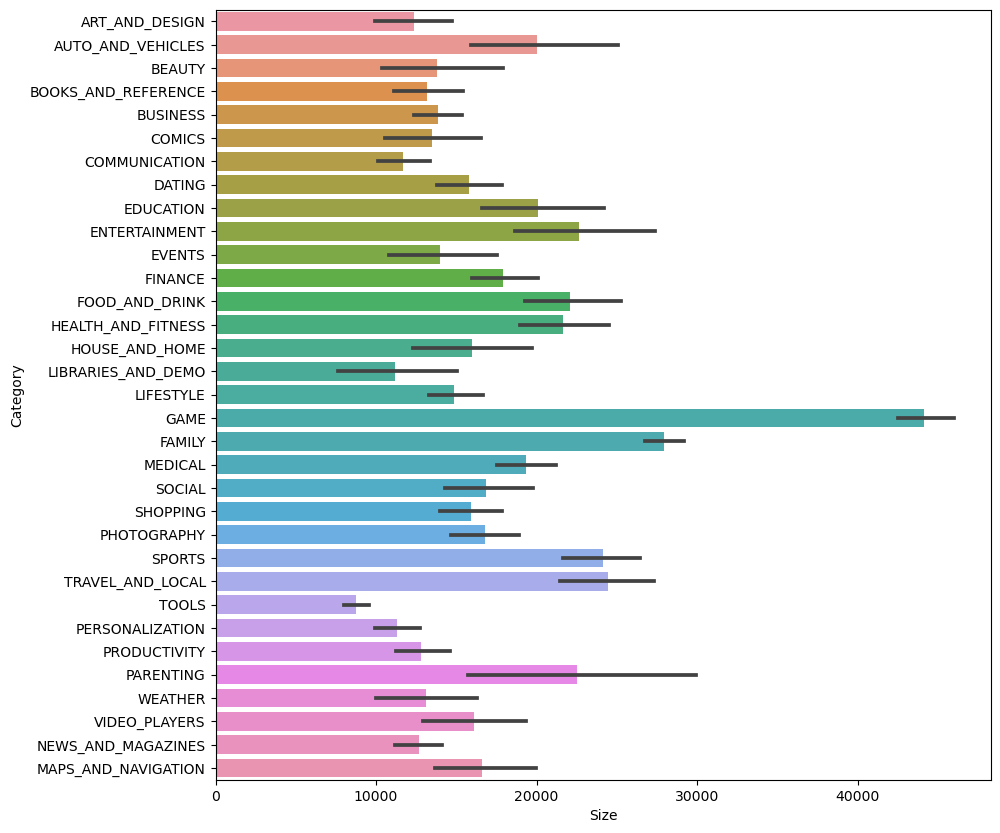

In [243]:
plt.figure(figsize=(10,10))
sns.barplot(y='Category',x='Size',data=data)

In [245]:
data['Last Updated'].dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: Last Updated, Length: 10357, dtype: int32

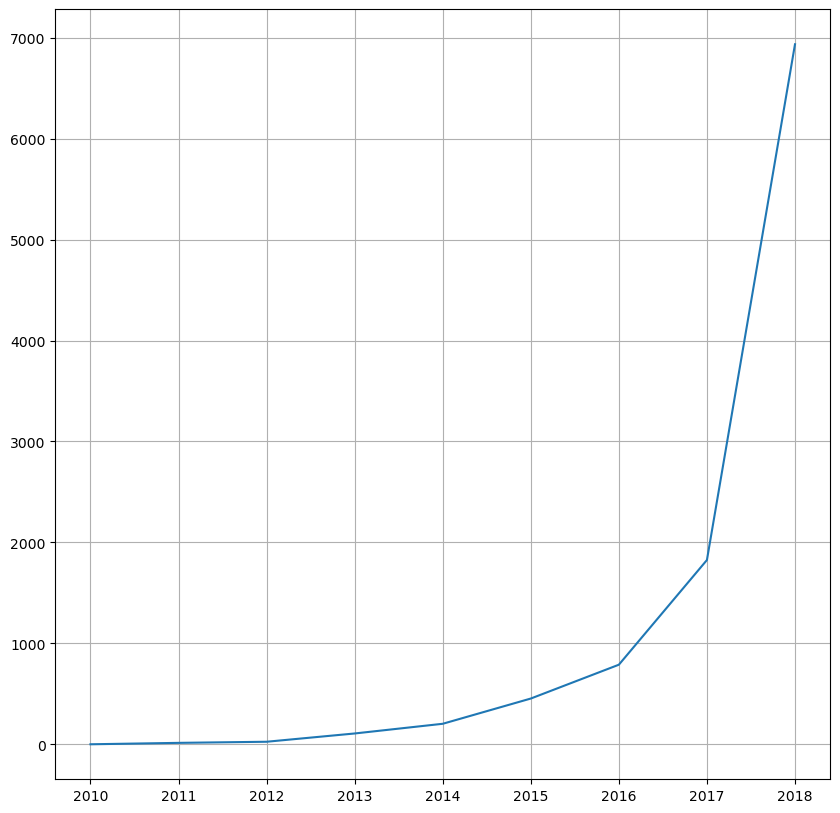

In [251]:
plt.figure(figsize=(10,10))
plt.plot(data['Last Updated'].dt.year.value_counts())
plt.grid()

In [252]:
data['Last Updated'].dt.year.value_counts()

Last Updated
2018    6934
2017    1826
2016     789
2015     454
2014     204
2013     108
2012      26
2011      15
2010       1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.2'),
  Text(2, 0, '1.4'),
  Text(3, 0, '1.5'),
  Text(4, 0, '1.6'),
  Text(5, 0, '1.7'),
  Text(6, 0, '1.8'),
  Text(7, 0, '1.9'),
  Text(8, 0, '2.0'),
  Text(9, 0, '2.1'),
  Text(10, 0, '2.2'),
  Text(11, 0, '2.3'),
  Text(12, 0, '2.4'),
  Text(13, 0, '2.5'),
  Text(14, 0, '2.6'),
  Text(15, 0, '2.7'),
  Text(16, 0, '2.8'),
  Text(17, 0, '2.9'),
  Text(18, 0, '3.0'),
  Text(19, 0, '3.1'),
  Text(20, 0, '3.2'),
  Text(21, 0, '3.3'),
  Text(22, 0, '3.4'),
  Text(23, 0, '3.5'),
  Text(24, 0, '3.6'),
  Text(25, 0, '3.7'),
  Text(26, 0, '3.8'),
  Text(27, 0, '3.9'),
  Text(28, 0, '4.0'),
  Text(29, 0, '4.1'),
  Text(30, 0, '4.2'),
  Text(31, 0, '4.3'),
  Text(32, 0, '4.4'),
  Text(33, 0, '4.5'),
  Text(34, 0, '4.6'),
  Text(35, 0, '4.7'),
  Text(36, 0, '4.8'),
  Text(37, 0, 

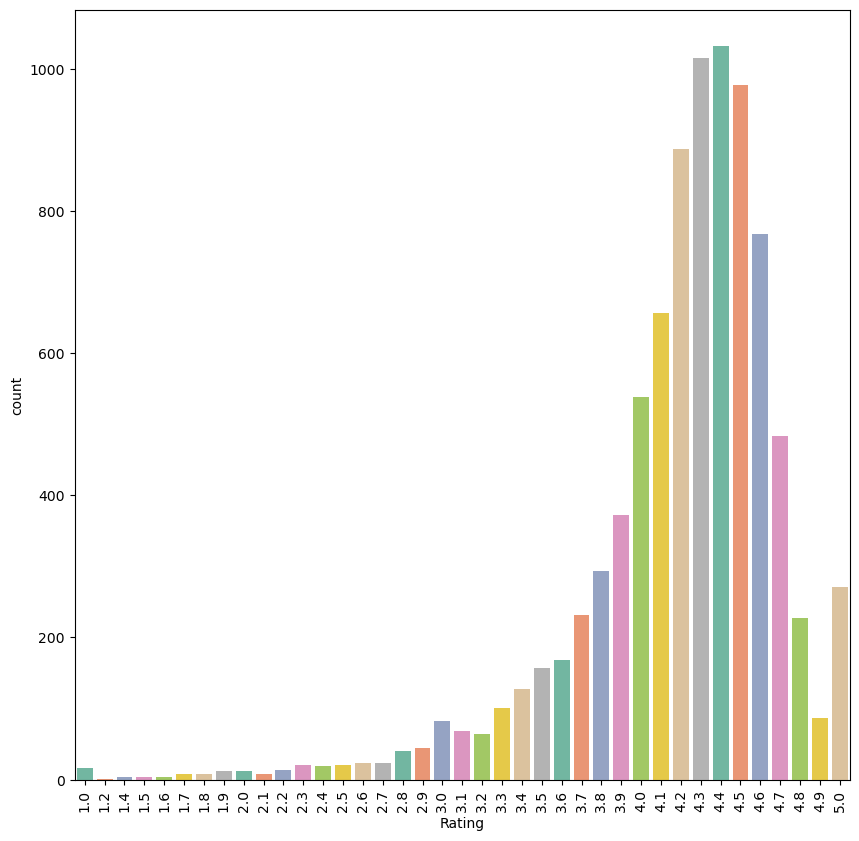

In [256]:
plt.figure(figsize=(10,10))
sns.countplot(x='Rating',data=data,palette='Set2')
plt.xticks(rotation=90)